# Исследование надежности заемщиков


>[Исследование надежности заемщиков](#scrollTo=c403887a)

>>[Общая информация.](#scrollTo=mf7ldpVyNha0)

>>[Предобработка данных](#scrollTo=a24db6f3)

>>>[Удаление пропусков](#scrollTo=88a1e479)

>>>[Обработка аномальных значений](#scrollTo=dfd336b6)

>>>[Изменение типов данных](#scrollTo=fb879ad3)

>>>[Обработка дубликатов](#scrollTo=301d85a4)

>>>[Категоризация данных](#scrollTo=a71b94ee)

>>[Исследовательский анализ данных](#scrollTo=a4c2cab6)

>>>[Анализ зависимости между количеством детей и возвратом кредита в срок](#scrollTo=724bf118)

>>>[Анализ зависимости между семейным положением и возвратом кредита в срок](#scrollTo=ad423e89)

>>>[Анализ зависимости между уровнем дохода и возвратом кредита в срок](#scrollTo=6ba5de4c)

>>>[Анализ зависимости между целью кредита и его возвратом в срок](#scrollTo=889a357c)

>>[Вывод](#scrollTo=6b0d8a83)



В нашем распоряжении имеется статистика о платёжеспособности клиентов одного крупного банка.  
Необходимо провести анализ данных, который будет использован для построения модели кредитного скоринга — системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** - определение факторов, влияющих на возврат кредита в срок

**Оцениваемы параметры**:  

* семейное положение
* количество детей
* уровень дохода
* цель получения кредита


## Общая информация.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#загрузим данные
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [3]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице двенадцать столбцов.
Тип данных в столбцах с текстом — `object`. В столбцах с числами `int64` и `float64`.

`days_employed` должен быть int64, можно оставить, так как не используем в расчетах

`total_income ` для удобства расчетов приведем далее к `int64`

Согласно документации к данным:

* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;  
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента
* `income_type ` — тип занятости
* `debt ` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.  
Cтолбец `total_income` лучше привести к целочисленному формату.  
Остальные форматы верные

## Предобработка данных

In [5]:
data.nunique()

children                8
days_employed       19351
dob_years              58
education              15
education_id            5
family_status           5
family_status_id        5
gender                  3
income_type             8
debt                    2
total_income        19351
purpose                38
dtype: int64

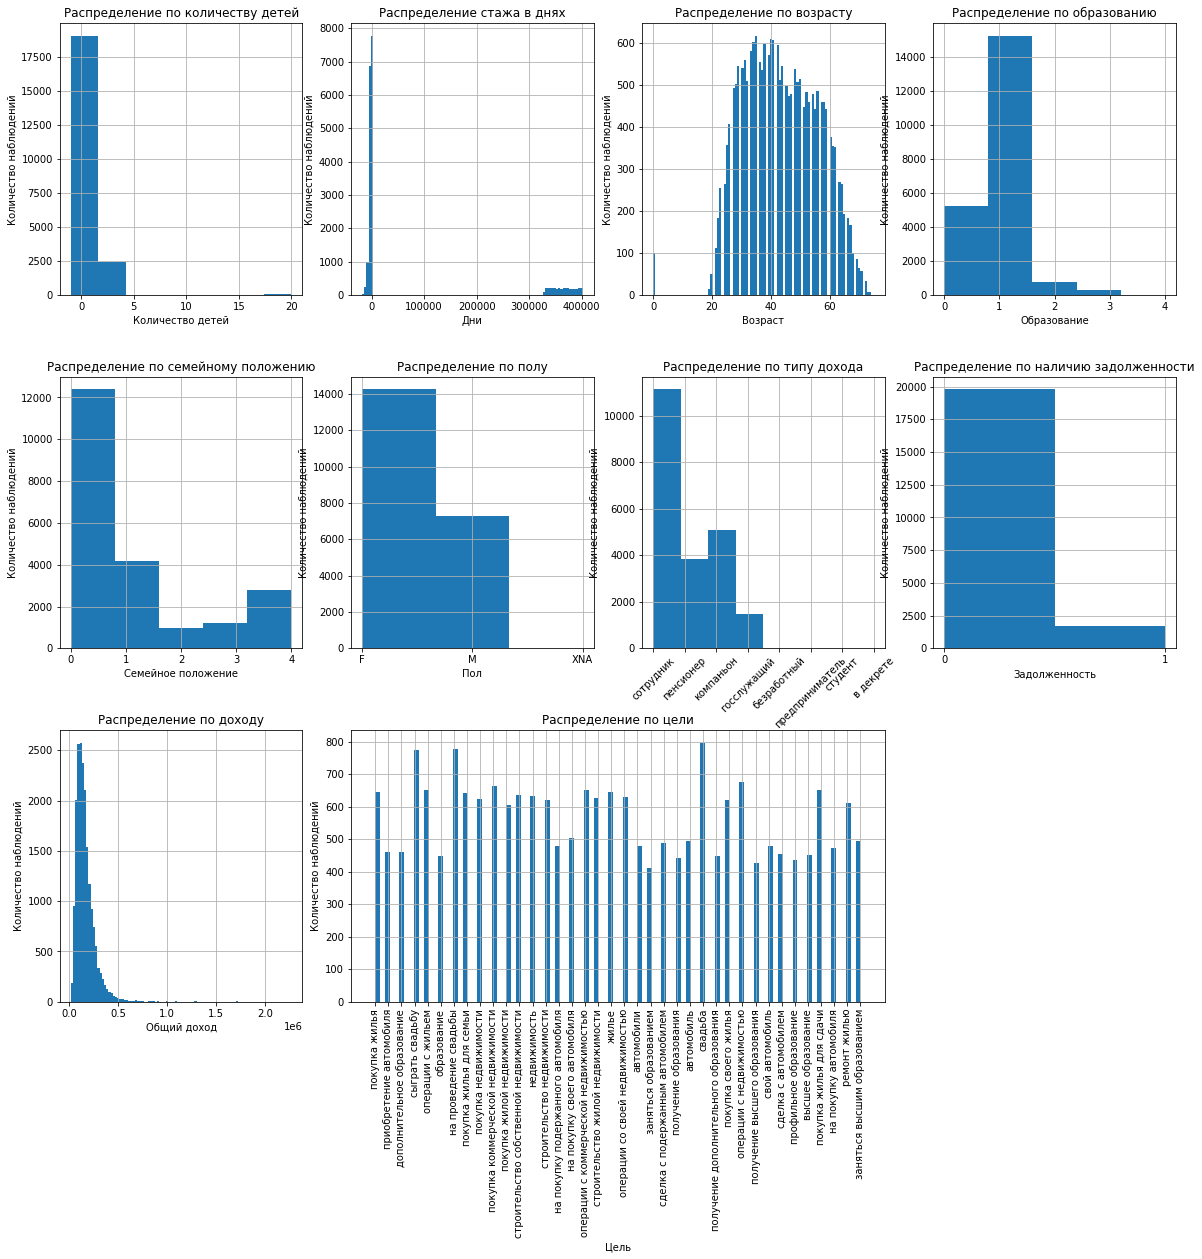

In [6]:
# проверим распределения количеств значений в таблице
fig = plt.figure(figsize=(20, 18))
plt.subplots_adjust(hspace= 0.3)

sub1 = fig.add_subplot(3, 4, 1)
data['children'].hist(bins=8)
plt.xlabel('Количество детей')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по количеству детей')

sub2 = fig.add_subplot(3, 4, 2)
data['days_employed'].hist(bins=100)
plt.xlabel('Дни')
plt.ylabel('Количество наблюдений')
plt.title('Распределение стажа в днях')

sub3 = fig.add_subplot(3, 4, 3)
data['dob_years'].hist(bins=100)
plt.xlabel('Возраст')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по возрасту')

sub4 = fig.add_subplot(3, 4, 4)
data['education_id'].hist(bins=5)
plt.xlabel('Образование')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по образованию')

sub5 = fig.add_subplot(3, 4, 5)
data['family_status_id'].hist(bins=5)
plt.xlabel('Семейное положение')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по семейному положению')

sub6 = fig.add_subplot(3, 4, 6)
data['gender'].hist(bins=3)
plt.xlabel('Пол')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по полу')

sub7 = fig.add_subplot(3, 4, 7)
data['income_type'].hist(bins=8)
plt.xlabel('Тип дохода')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по типу дохода')
plt.xticks(rotation=45)

sub8 = fig.add_subplot(3, 4, 8)
data['debt'].hist(bins=2)
plt.xlabel('Задолженность')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по наличию задолженности')
plt.xticks(data['debt'].unique())

sub9 = fig.add_subplot(3, 4, 9)
data['total_income'].hist(bins=100)
plt.xlabel('Общий доход')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по доходу')

sub10 = fig.add_subplot(3, 4, (10,11))
data['purpose'].hist(bins=100)
plt.xlabel('Цель')
plt.ylabel('Количество наблюдений')
plt.title('Распределение по цели')
plt.xticks(rotation=90);

Есть аномальные значения параметров `children`,`days_employed`, `dob_years`,пропуски по `gender`, близкие по смыслу значения в `purpose`

Подробнее рассмотрим ниже.

### Удаление пропусков

In [7]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`.

In [8]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типа занятости `income_type`.

In [9]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [10]:
# проверим, что все удалено
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Обработка аномальных значений

в столбце `children` встречаются отрицательные значения и аномально высокие:

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [12]:
# удалим их
data = data[(data['children'] != -1) & (data['children'] != 20)]

В столбце `days_employed`встречаются отрицательные значения. Заменим все отрицательные значения положительными с помощью метода `abs()`.

In [13]:
data['days_employed'] = data['days_employed'].abs()

Также на гистограмме мы видели аномально высокие значения, посчитаем медиану по каждой группе типа дохода:

In [14]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получаются аномально большие значения. Заменить нам их нечем, поэтому оставим как есть.

Посмотрим на нулевые значения в столбце возраст `dob_years`

In [15]:
data[data['dob_years']==0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,1574.202821,0,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,жилье
20462,0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,331741.271455,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


Всего 100 значений, это явная ошибка заполнения, тк `days_employed` заполнено  
Так как мы не планируем исследовать зависимость от этого параметра, оставим эти данные как есть

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [16]:
    data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

В столбце `education ` были неявные дубликаты - одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв.  
Приведем их к нижнему регистру.

In [17]:
data['education'] = data['education'].str.lower()

Проверим явные дубликаты

In [18]:
data.duplicated().sum()

71

In [19]:
# удалим их
data = data.drop_duplicates()

**В данных присутствовали дубликаты, аномальные значения и выбросы.  
Также были пропуски в колонках days_employed и total_income. Возможно это связано с тем, что:** 
 * **нет трудоустройства - нет дохода и данные кредиты оформлены без подтверждения дохода**
 * **техническая ошибка чтения данных, пропуски присутствуют в столбцах с типом float64**

### Категоризация данных

Категоризируем доход для анализа в соответствии с таблицей:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 будет назначиена категория `'E'`, а клиенту, получающему 235000, — `'B'`. 

In [20]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [21]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Посмотрим на значения столбца с целями кредита:

In [22]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Унифицируем цели кредита из столбца `purpose`.

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [23]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [24]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [25]:
#переименуем значения в столбце debt для улучшения вида сводных таблиц
data['debt']=data['debt'].replace(0,'notdebtor')
data['debt']=data['debt'].replace(1,'debtor')

 


## Исследовательский анализ данных

### Анализ зависимости между количеством детей и возвратом кредита в срок

In [26]:
# Сделаем сводную таблицу по количеству взятых кредитых в зависимости от количетсва детей

data_pivot = data.pivot_table(index=['children'], columns='debt', values='total_income', 
                              aggfunc='count', fill_value= 0, margins = True, margins_name='total')
data_pivot['share_notdebtors'] = data_pivot['notdebtor'] / data_pivot['total']
data_pivot['share_notdebtors'] = data_pivot['share_notdebtors'].apply(lambda x: format(x, '.1%'))
display(data_pivot)


debt,debtor,notdebtor,total,share_notdebtors
children,,,,
0,1063,13028,14091,92.5%
1,444,4364,4808,90.8%
2,194,1858,2052,90.5%
3,27,303,330,91.8%
4,4,37,41,90.2%
5,0,9,9,100.0%
total,1732,19599,21331,91.9%


**Вывод:** 

* Максимально высокие значения наблюдаются при отсутсвиии детей и количестве детей равном 3.

* Нельзя сказать, что есть прямая корреляция между количеством детей и возвратом кредита в срок, но можно сказать, что при остсутвие детей возврат выше, чем при их наличии. Группа с 3 детьми малочисленна для формирования выводов. 

* При количестве детей равном 5, доля возврата в срок 100%, но выборка из 9 кредитов крайне мала для формирования зависимости.



### Анализ зависимости между семейным положением и возвратом кредита в срок

In [27]:
# Сделаем сводную таблицу по количеству взятых кредитов в зависимости от семейного положения
data_pivot = data.pivot_table(index=['family_status'], columns='debt', values='total_income', 
                              aggfunc='count', fill_value= 0, margins = True, margins_name='total')
data_pivot['share_notdebtors'] = data_pivot['notdebtor'] / data_pivot['total']
data_pivot['share_notdebtors'] = data_pivot['share_notdebtors'].apply(lambda x: format(x, '.1%'))
display(data_pivot)


debt,debtor,notdebtor,total,share_notdebtors
family_status,,,,
Не женат / не замужем,273,2523,2796,90.2%
в разводе,84,1105,1189,92.9%
вдовец / вдова,63,888,951,93.4%
гражданский брак,385,3749,4134,90.7%
женат / замужем,927,11334,12261,92.4%
total,1732,19599,21331,91.9%


**Вывод:** 

* Максимальный процент возвратов кредита в срок наблюдается при семейном положении: официальный брак, в разводе, вдова/вдовец. 
* Минимальный процент возвратов кредита в срок у людей состоящих в гражданском браке и без отношений.
* Также нужно отметить, что не все люди могли отметить в анкете наличие гражданоского брака, а указать вместо этого отстутствие отношений. Поэтому группа "гражданский брак" может быть крупнее.


### Анализ зависимости между уровнем дохода и возвратом кредита в срок

In [28]:
# Сделаем сводную таблицу по количеству взятых кредитых в зависимости от уровня дохода
data_pivot = data.pivot_table(index=['total_income_category'], columns='debt', values='total_income', 
                              aggfunc='count', fill_value= 0, margins = True, margins_name='total')
data_pivot['share_notdebtors'] = data_pivot['notdebtor'] / data_pivot['total']
data_pivot['share_notdebtors'] = data_pivot['share_notdebtors'].apply(lambda x: format(x, '.1%'))
display(data_pivot)

debt,debtor,notdebtor,total,share_notdebtors
total_income_category,,,,
A,2,23,25,92.0%
B,354,4660,5014,92.9%
C,1353,14568,15921,91.5%
D,21,328,349,94.0%
E,2,20,22,90.9%
total,1732,19599,21331,91.9%


- 1 000 001 и выше — `'A'`
- 200 001–1 000 000 — `'B'`
- 50 001–200 000 — `'C'`
- 30 001–50 000 — `'D'`
- 0–30 000 — `'E'`


**Вывод:** 
* Прямой зависимости между уровнем дохода и возвратом кредита в срок не наблюдается. 
* Но если рассмотреть только самые многочисленные группы B и C, то в группе B с более высоким уровнем дохода процент возврата выше, чем в C. В таком диапазоне сравнения, без групп с крайне высокими и низкими значениями дохода, можно сказать, что рост дохода ведет к незнечительному увеличению вероятности возврата кредита в срок.
* Также наблюдаются отклонения значений возврата от среднего процента в самых низкодоходных группах D и E, но группы немногочисленные, чтобы делать выводы.

### Анализ зависимости между целью кредита и его возвратом в срок

In [29]:
# Сделаем сводную таблицу по количеству взятых кредитых в зависимости от цели кредита.
data_pivot = data.pivot_table(index=['purpose_category'], columns='debt', values='total_income', 
                              aggfunc='count', fill_value= 0, margins = True, margins_name='total')
data_pivot['share_notdebtors'] = data_pivot['notdebtor'] / data_pivot['total']
data_pivot['share_notdebtors'] = data_pivot['share_notdebtors'].apply(lambda x: format(x, '.1%'))
display(data_pivot)

debt,debtor,notdebtor,total,share_notdebtors
purpose_category,,,,
операции с автомобилем,400,3879,4279,90.7%
операции с недвижимостью,780,9971,10751,92.7%
получение образования,369,3619,3988,90.7%
проведение свадьбы,183,2130,2313,92.1%
total,1732,19599,21331,91.9%


**Вывод:** 
* Максимальный процент возвратов кредита в срок наблюдается при целях, связанных с приобретением недвижимости и проведением свадьбы.
Можно предположить, что покупка недвижимости более ответственное мероприятие, что влияет на дальнейшие действия. 


**На основании полученных данным создадим категорию идеального заемщика:**
* нет детей
* в разводе, женат / замужем,вдовец / вдова
* цель - операции с недвижимостью, проведение свадьбы

Назовем его `reliable`:



In [30]:
#создание функции для категоризации заемщика

def reliable_group(row):
    children = row['children']
    family_status = row['family_status']
    purpose_category = row['purpose_category']
    if (children==0 
    and family_status in ['в разводе','женат / замужем','вдовец / вдова'] 
    and purpose_category in ['операции с недвижимостью','проведение свадьбы']):
        return 'reliable'
    return 'not-reliable'

row_values = [0,'в разводе', 'операции с автомобилем']
row_columns = ['children', 'family_status', 'purpose_category']
row = pd.Series(data=row_values, index=row_columns)
#print(reliable_group(row))
data['reliable'] = data.apply(reliable_group,axis=1)



In [31]:
# Сделаем сводную таблицу по количеству взятых кредитых в зависимости от категории заемщика.

data_pivot = data.pivot_table(index=['reliable'], columns='debt', values='total_income', 
                              aggfunc='count', fill_value= 0, margins = True, margins_name='total')
data_pivot['share_notdebtors'] = data_pivot['notdebtor'] / data_pivot['total']
data_pivot['share_notdebtors'] = data_pivot['share_notdebtors'].apply(lambda x: format(x, '.1%'))
print(data_pivot)

debt          debtor  notdebtor  total share_notdebtors
reliable                                               
not-reliable    1402      14791  16193            91.3%
reliable         330       4808   5138            93.6%
total           1732      19599  21331            91.9%


Таким образом, процент возврата кредита в срок заемщика подоходящего под указанныем выше категории составляет 93,6%, что выше среднего на ~ 2%

## Вывод

**Цель исследования**

Определить как влияет количество детей, семейное положение, уровень дохода и цель кредита на факт погашения кредита в срок.

Для этого мы посмотрели как меняется доля закрытых без просрочек кредитов в зависимости от указанных параметров.

Так как в принципе процент возврата кредита в срок высокий, значительных отклонений в значениях возврата кредита в срок нет.
Отличия в среднем до 2 процентов.

Возврат кредита в срок выше:

* при остсутвие детей 
* при семейном положение официальный брак, в разводе, вдова/вдовец
* при целях кредита, связанных с недвижимостью и проведением свадьбы


* в зависимости от дохода ситуация неоднозначная - при определенном диапазане уровня дохода
вероятность возврата кредита в срок растет.

